# DAT257x: Reinforcement Learning Explained

## Lab: Temporal Difference Learning

### SARSA Agent

In [1]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../") 
    
from lib.envs.simple_rooms import SimpleRoomsEnv
from lib.simulation import Experiment

In [3]:
class Agent(object):  
        
    def __init__(self, actions):
        self.actions = actions
        self.num_actions = len(actions)

    def act(self, state):
        raise NotImplementedError

In [6]:
class SarsaAgent(Agent):
    
    def __init__(self, actions, epsilon=0.01, alpha=0.5, gamma=1):
        super(SarsaAgent, self).__init__(actions)
        
        self.Q = {}
        for a in self.actions:
            self.Q[('0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.01.0',a)] = 0 # SimpleRoomsEnv
        
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        
    def stateToString(self, state):
        mystring = ""
        if np.isscalar(state):
            mystring = str(state)
        else:
            for digit in state:
                mystring += str(digit)
        return mystring    
    
    def act(self, state):
        stateStr = self.stateToString(state)      
        action = np.random.randint(0, self.num_actions) 
        
        ## epsilon greedy policy 
        state_set = set([k[0] for k in agent.Q.keys()])
        if stateStr not in state_set:
            for a in self.actions:
                self.Q[(stateStr,a)] = 0
        
        if self.epsilon == 0:
            choice = 0
        elif self.epsilon == 1:
            choice = 1
        else:
            choice = np.random.binomial(1, self.epsilon)
            
        if choice != 1:    
            action_dict = {}
            for key,value in self.Q.items():
                if key[0]==stateStr:
                    action_dict[key[1]] = value
            highest=max(action_dict.values())  
            actions = [a for a,v in action_dict.items() if v == highest]
            # If multiple max chose random
            action = np.random.choice(actions)

        return action

    def learn(self, state1, action1, reward, state2, action2):
        state1Str = self.stateToString(state1)
        state2Str = self.stateToString(state2)
        
        ## sarsa update
        td_target = reward + self.gamma*self.Q[(state2Str, action2)]
        self.Q[(state1Str, action1)] += self.alpha*(td_target - self.Q[(state1Str, action1)])
        """
        SARSA Update
        Q(s,a) <- Q(s,a) + alpha * (reward + gamma * Q(s',a') - Q(s,a))
        or
        Q(s,a) <- Q(s,a) + alpha * (td_target - Q(s,a))
        or
        Q(s,a) <- Q(s,a) + alpha * td_delta
        """

<IPython.core.display.Javascript object>


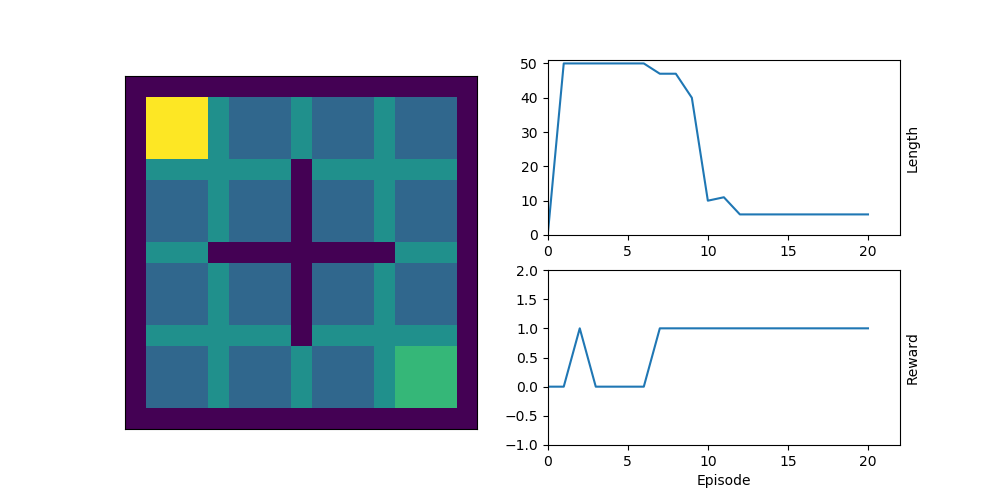

{('0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.01.0', 0): 0, ('0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.01.0', 1): 0, ('0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.01.0', 2): 0, ('0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.01.0', 3): 0, ('1.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0', 0): 0.0, ('1.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0', 1): 0.80560302734375, ('1.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0', 2): 0.0, ('1.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0', 3): 0.0, ('0.00.00.00.01.00.00.00.00.00.00.00.00.00.00.00.0', 0): 0.0, ('0.00.00.00.01.00.00.00.00.00.00.00.00.00.00.00.0', 1): 0.0, ('0.00.00.00.01.00.00.00.00.00.00.00.00.00.00.00.0', 2): 0.0, ('0.00.00.00.01.00.00.00.00.00.00.00.00.00.00.00.0', 3): 0.0, ('0.00.00.00.00.00.00.00.01.00.00.00.00.00.00.00.0', 0): 0.0, ('0.00.00.00.00.00.00.00.01.00.00.00.00.00.00.00.0', 1): 0.0, ('0.00.00.00.00.00.00.00.01.00.00.00.00.00.00.00.0', 2): 0.0, ('0.00.00.00.00.00.00.00.01.00.00.00.00.00.00.00.0', 3): 0.0, ('

In [7]:
interactive = True
%matplotlib nbagg
env = SimpleRoomsEnv()
agent = SarsaAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_sarsa(20, interactive)
print(agent.Q)

<Figure size 720x360 with 0 Axes>

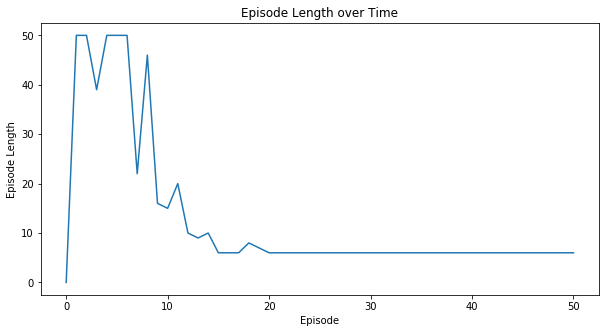

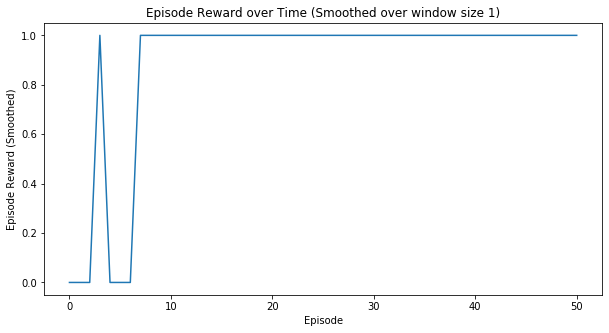

In [8]:
interactive = False
%matplotlib inline
env = SimpleRoomsEnv()
agent = SarsaAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_sarsa(50, interactive)